<a href="https://colab.research.google.com/github/aluqbnle/ml-sandbox/blob/master/03_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# パーセプトロン
パーセプトロンはニューラルネットの基礎となっている2層の二値分類器
いろいろな特徴量に対して重みを学習によって得ることで、
新しいデータに対してそれっぽさの大事さを考慮した総和みたいなのが
しきい値を超えてるかで判別するかんじみたい

In [0]:
from pandas import DataFrame
from sklearn.datasets import load_breast_cancer

In [0]:
breast_cancer=load_breast_cancer()
X=breast_cancer.data[:,:10]
y=breast_cancer.target

columns=['半径', 'テクスチャ', '周囲の長さ', '面積', 'なめらかさ', 'コンパクト性', 'へこみ', 'へこみの数', '対称性', 'フラクタル次元']
df=DataFrame(data=X[:,:10],columns=columns)
df['目的変数']=y

In [0]:
X=df[['面積','へこみ']].values
y=df['目的変数'].values

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [7]:
print('全てのデータ数 = ', len(y))
print('訓練データ数 = ', len(y_train))
print('テストデータ数 = ', len(y_test))

全てのデータ数 =  569
訓練データ数 =  398
テストデータ数 =  171


In [0]:
from sklearn.preprocessing import StandardScaler

In [9]:
# StandardScalerのインスタンスを作成する
sc=StandardScaler()
# 訓練データの平均と標準偏差を計算する
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
print(sc.mean_)

[6.59770854e+02 8.80707764e-02]


In [0]:
# 訓練データの標準化
X_train_std =sc.transform(X_train)

# テストデータの標準化
# テストデータは訓練データの平均と標準偏差を用いて標準化する
X_test_std=sc.transform(X_test)

In [12]:
# 標準化後の訓練データの平均値
train_mean=X_train_std.mean(axis=0)
print(train_mean)

[2.23160407e-16 5.20521649e-16]


In [13]:
# 標準化後の訓練データの標準偏差
train_std=X_train_std.std(axis=0)
print(train_std)

[1. 1.]


In [14]:
# 標準化後のテストデータの平均値
test_mean=X_test_std.mean(axis=0)
print(test_mean)

[-0.04532172  0.0311842 ]


In [15]:
# 標準化後のテストデータの標準偏差
test_std = X_test_std.std(axis=0)
print(test_std)

[0.9345188  1.07933796]


In [0]:
from sklearn.linear_model import Perceptron

In [0]:
ppn = Perceptron(max_iter=1000,random_state=42)

In [18]:
ppn.fit(X_train_std, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=1000, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=42, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [19]:
# テストデータの予測
pred =ppn.predict(X_test_std)
# 予測の確認
print(pred)

[1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1
 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [20]:
#テストデータの正解値
print(y_test)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1]


In [0]:
from sklearn.metrics import accuracy_score

パーセプトロンはこの先の学習アルゴリズムより一番劣っているので正解率がよくない

In [22]:
accuracy_score(y_test,pred)

0.8830409356725146

In [23]:
!pip3 install mlxtend

In [24]:
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 7 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 1s (6,174 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 113597 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-18ubuntu1) ...
Selecting previously unselected package fonts-ipa

In [25]:
import matplotlib
matplotlib.get_cachedir()

'/root/.cache/matplotlib'

In [0]:
rm /root/.cache/matplotlib/fontList.json

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['IPAGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


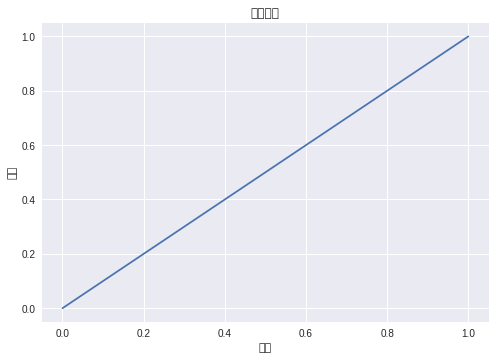

In [27]:
import matplotlib.pyplot as plt

jp_font = {'fontname':'IPAGothic'}

plt.plot([0, 1], [0, 1])
plt.xlabel('横軸', **jp_font)
plt.ylabel('縦軸', **jp_font)
plt.title('タイトル', **jp_font)
plt.show()

In [28]:
!pip install japanize-matplotlib

    100% |████████████████████████████████| 4.1MB 1.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/47/d1/ba/1a686af7cc042edde2c2f4cb18bd981f7eefdcbfe688590d25
Successfully built japanize-matplotlib


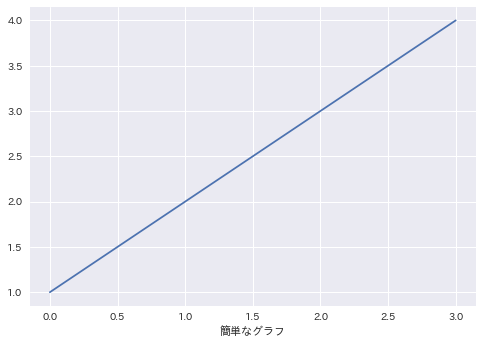

In [29]:
import matplotlib.pyplot as plt
import japanize_matplotlib

plt.plot([1, 2, 3, 4])
plt.xlabel('簡単なグラフ')
plt.show()

In [0]:
import numpy
from matplotlib import pyplot
import japanize_matplotlib
#pyplot.rcParams['font.family']='IPAGothic'
from mlxtend.plotting import plot_decision_regions

In [0]:
# すべてのデータをプロットするとデータが多すぎるので制限する
N = 100

# 訓練データとテストデータからN個ずつのサンプルを先頭から取ってくる
sampled_X = numpy.vstack((X_train_std[:N], X_test_std[:N]))
sampled_y = numpy.hstack((y_train[:N], y_test[:N]))

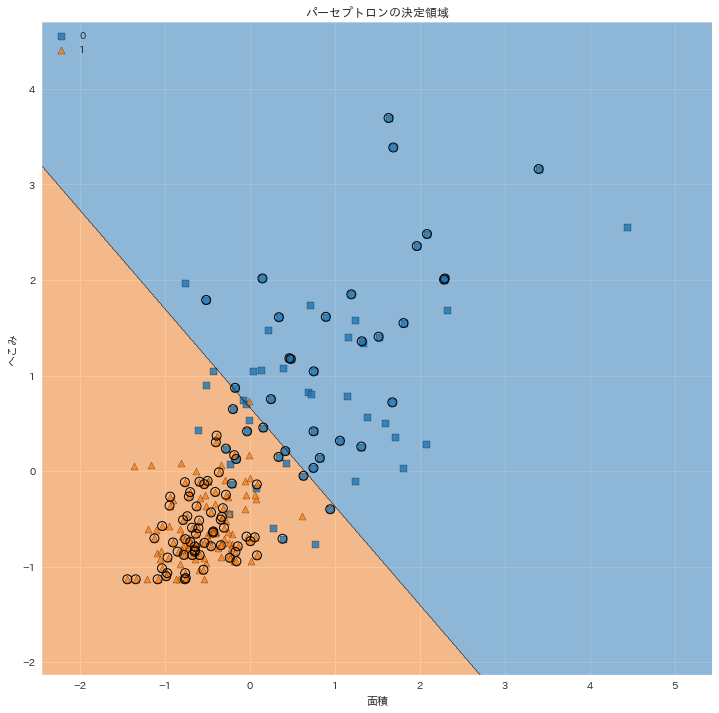

In [32]:
pyplot.figure(figsize=(12, 12))
pyplot.xlabel("面積")
pyplot.ylabel("へこみ")
pyplot.title("パーセプトロンの決定領域")

# 決定領域のプロット
plot_decision_regions(sampled_X, sampled_y, clf=ppn, legend=2,  X_highlight=X_test_std[:N])